<a href="https://colab.research.google.com/github/DanielEXT10/ComputerVision/blob/main/Deteccion_de_Anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deteccion de anomalias (Z - Score) - Agrupacion(K Nearest Neighbors vs K- Means)
Daniel Alfonso Garcia

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [3]:
data = pd.read_csv('/content/drive/MyDrive/IA Unir/Aprendizaje automatico/Actividad Grupal/creditcardcsvpresent.csv')

In [4]:
data.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [6]:
data.columns

Index(['Merchant_id', 'Transaction date', 'Average Amount/transaction/day',
       'Transaction_amount', 'Is declined', 'Total Number of declines/day',
       'isForeignTransaction', 'isHighRiskCountry', 'Daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt', '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

## Variables numericas

In [7]:
numeric =list(data.select_dtypes(exclude = 'object').columns)

Obtenemos las medidas de tendencia central y dispersion, asi como los cuartiles de los datos distribuidos.

In [8]:
data[numeric].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Merchant_id,3075.0,5.026634e+09,9.870778e+08,3.160041e+09,4.170814e+09,5.025578e+09,5.889625e+09,6.665906e+09
Transaction date,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Amount/transaction/day,3075.0,5.150266e+02,2.919070e+02,4.011527e+00,2.697880e+02,5.025496e+02,7.652728e+02,2.000000e+03
Transaction_amount,3075.0,9.876399e+03,1.013533e+04,0.000000e+00,2.408781e+03,6.698892e+03,1.442257e+04,1.080000e+05
Total Number of declines/day,3075.0,9.573984e-01,2.192391e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01
Daily_chargeback_avg_amt,3075.0,5.573756e+01,2.066348e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.980000e+02
6_month_avg_chbk_amt,3075.0,4.002241e+01,1.559688e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.980000e+02
6-month_chbk_freq,3075.0,3.918699e-01,1.548479e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00


### Histograma variables numericas

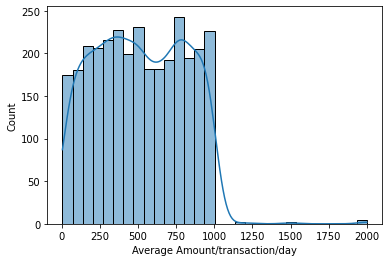

In [9]:
sns.histplot(data=data, x='Average Amount/transaction/day', kde=True)

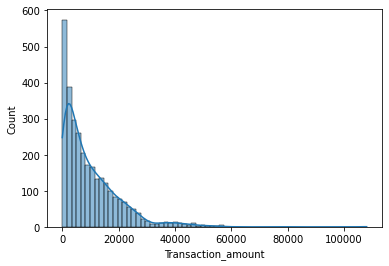

In [10]:
sns.histplot(data=data, x='Transaction_amount', kde=True)

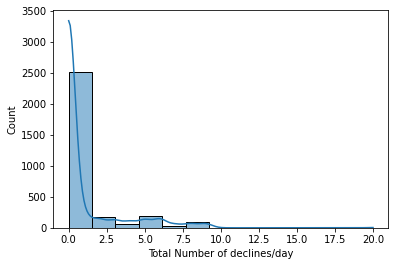

In [11]:
sns.histplot(data=data, x='Total Number of declines/day', kde=True)

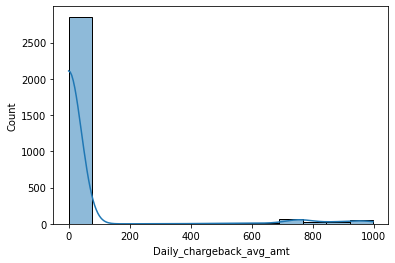

In [12]:
sns.histplot(data=data, x='Daily_chargeback_avg_amt', kde=True)

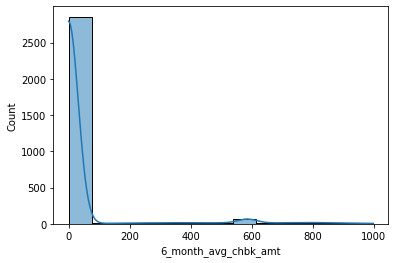

In [13]:
sns.histplot(data=data, x='6_month_avg_chbk_amt', kde=True)

## Correlaciones

In [14]:
correlaciones = data.corr()
correlaciones
print (correlaciones['Average Amount/transaction/day'].sort_values(ascending=False)[:7])

Average Amount/transaction/day    1.000000
Transaction_amount                0.587111
6-month_chbk_freq                 0.071849
Daily_chargeback_avg_amt          0.060429
6_month_avg_chbk_amt              0.060284
Merchant_id                       0.018223
Total Number of declines/day     -0.009682
Name: Average Amount/transaction/day, dtype: float64


In [15]:
print (correlaciones['Transaction_amount'].sort_values(ascending=False)[:7])

Transaction_amount                1.000000
Average Amount/transaction/day    0.587111
6-month_chbk_freq                 0.297623
6_month_avg_chbk_amt              0.259663
Total Number of declines/day      0.259309
Daily_chargeback_avg_amt          0.252298
Merchant_id                       0.046065
Name: Transaction_amount, dtype: float64


## Tablas de contingencia de variables categoricas

#### Frecuencia absoluta

Lo que buscamos es obtener la frecuencia absoluta de las columnas categoricas, para cada valor diferente

In [16]:
data['Is declined'] = pd.Categorical(data['Is declined'])
data['isForeignTransaction'] = pd.Categorical(data['isForeignTransaction'])
data['isFradulent'] = pd.Categorical(data['isFradulent'])
data['isHighRiskCountry'] =pd.Categorical(data['isHighRiskCountry'])

In [17]:
data.groupby('isForeignTransaction')['Merchant_id'].count()

isForeignTransaction
N    2369
Y     706
Name: Merchant_id, dtype: int64

In [18]:
data.groupby('Is declined')['Merchant_id'].count()

Is declined
N    3018
Y      57
Name: Merchant_id, dtype: int64

In [19]:
data.groupby('isHighRiskCountry')['Merchant_id'].count()

isHighRiskCountry
N    2870
Y     205
Name: Merchant_id, dtype: int64

In [20]:
data.groupby('isFradulent')['Merchant_id'].count()

isFradulent
N    2627
Y     448
Name: Merchant_id, dtype: int64

#### Frecuencia Relativa

Crearemos diagramas de pastel para representar graficamente la frecuencia relativa de las variables categoricas en funcion de sus valores.

In [21]:

fig = px.pie(data, values='Merchant_id', names='isHighRiskCountry', title= 'High Risk Country', width=400, height=400)
fig1 = px.pie(data, values='Merchant_id', names='Is declined', title = 'Declined Transaction', width=400, height=400)
fig2 = px.pie(data, values='Merchant_id', names='isForeignTransaction', title ='Foreing Transaction', width=400, height=400)
fig3 = px.pie(data, values='Merchant_id', names='isFradulent', title ='Fradulent Transaction', width=400, height=400)

fig.show()
fig1.show()
fig2.show()
fig3.show()

## Deteccion de Anomalias

### Analisis Z scores
Generalmente se utiliza para conjuntos de datos que muestran un esquema de distribucion Gaussiana, sirve como una referencia de cuanto se encuentra alejado el dato que nos interesa del promedio de los valores, los z-scores estan definidos de la siguiente manera:
* Z-score(i) = (x(i)-media)/ desviacion estandar

In [22]:
import scipy.stats as estad

data['Trans zscore'] = estad.zscore(data['Transaction_amount'])
data['Trans_Aver zscore'] = estad.zscore(data['Average Amount/transaction/day'])

data[['Transaction_amount','Trans zscore','Average Amount/transaction/day','Trans_Aver zscore']]

,Transaction_amount,Trans zscore,Average Amount/transaction/day,Trans_Aver zscore
0,3000.0,-0.678569,100.0,-1.422008
1,4300.0,-0.550284,100.0,-1.422008
2,4823.0,-0.498674,185.5,-1.129059
3,5008.5,-0.480368,185.5,-1.129059
4,26000.0,1.591090,500.0,-0.051486
...,...,...,...,...
3070,11000.0,0.110878,500.0,-0.051486
3071,0.0,-0.974611,800.0,0.976406
3072,20800.0,1.077950,800.0,0.976406
3073,12000.0,0.209559,1500.0,3.374820


### Analisis por aproximacion grafica: Boxplot
Graficaremos un Boxplot para cada variable numerica.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



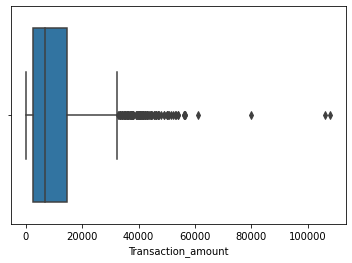

In [23]:
sns.boxplot(data['Transaction_amount'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



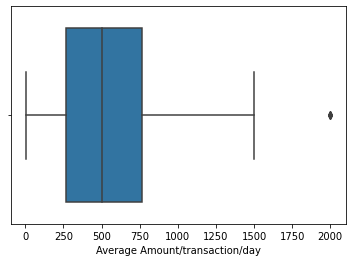

In [24]:
sns.boxplot(data['Average Amount/transaction/day'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



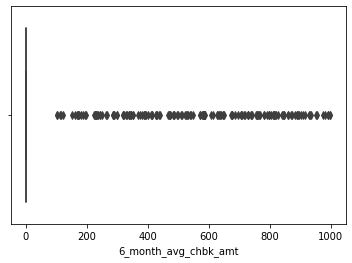

In [25]:
sns.boxplot(data['6_month_avg_chbk_amt'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



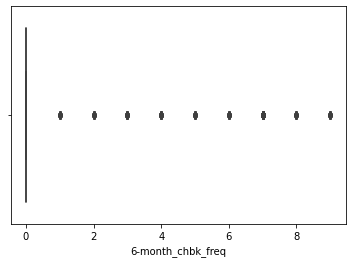

In [26]:
sns.boxplot(data['6-month_chbk_freq'])

## Transformacion de variables categoricas a numericas

In [27]:
from sklearn.preprocessing import LabelEncoder

### Multi-column label encoder

In [28]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [29]:
categoric = list(data.select_dtypes(exclude = 'number').columns)

In [30]:
categoric

['Is declined', 'isForeignTransaction', 'isHighRiskCountry', 'isFradulent']

In [31]:
df = MultiColumnLabelEncoder(columns = categoric).fit_transform(data)
df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent,Trans zscore,Trans_Aver zscore
0,3160040998,NaN,100.0,3000.0,0,5,1,1,0,0.0,0,1,-0.678569,-1.422008
1,3160040998,NaN,100.0,4300.0,0,5,1,1,0,0.0,0,1,-0.550284,-1.422008
2,3160041896,NaN,185.5,4823.0,1,5,0,0,0,0.0,0,1,-0.498674,-1.129059
3,3160141996,NaN,185.5,5008.5,1,8,0,0,0,0.0,0,1,-0.480368,-1.129059
4,3160241992,NaN,500.0,26000.0,0,0,1,1,800,677.2,6,1,1.591090,-0.051486


## Clustering - K Nearest Neighbors

In [32]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [33]:
df.columns

Index(['Merchant_id', 'Transaction date', 'Average Amount/transaction/day',
       'Transaction_amount', 'Is declined', 'Total Number of declines/day',
       'isForeignTransaction', 'isHighRiskCountry', 'Daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt', '6-month_chbk_freq', 'isFradulent',
       'Trans zscore', 'Trans_Aver zscore'],
      dtype='object')

Eliminamos aquellas columnas que no aportan data util al modelo

In [34]:
df = df.drop(['Merchant_id'],1)
df = df.drop(['Transaction date'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [35]:
df

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent,Trans zscore,Trans_Aver zscore
0,100.0,3000.0,0,5,1,1,0,0.0,0,1,-0.678569,-1.422008
1,100.0,4300.0,0,5,1,1,0,0.0,0,1,-0.550284,-1.422008
2,185.5,4823.0,1,5,0,0,0,0.0,0,1,-0.498674,-1.129059
3,185.5,5008.5,1,8,0,0,0,0.0,0,1,-0.480368,-1.129059
4,500.0,26000.0,0,0,1,1,800,677.2,6,1,1.591090,-0.051486
...,...,...,...,...,...,...,...,...,...,...,...,...
3070,500.0,11000.0,1,0,0,0,754,585.0,7,0,0.110878,-0.051486
3071,800.0,0.0,1,0,0,0,754,585.0,7,0,-0.974611,0.976406
3072,800.0,20800.0,1,0,0,0,754,585.0,7,0,1.077950,0.976406
3073,1500.0,12000.0,1,0,1,1,754,585.0,7,0,0.209559,3.374820


In [36]:
x = df.drop(['isFradulent'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [37]:
y = df['isFradulent']

### Dividimos nuestro dataset en Train-Test

In [38]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size = 0.2)

In [39]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()


In [40]:
clf.fit(x_train,y_train)

KNeighborsClassifier()

Finalmente analizamos los resultados obtenidos a partir de nuestro algoritmo de K Nearest Neighbors

In [41]:
accuracy = clf.score(x_test,y_test)
accuracy

0.9349593495934959

Con este algoritmo obtuvimos un accuracy de mas del 90% en nuestras predicciones, lo que significa que el modelo se adapta bien a la data que tenemos.

## Unsupervised Learning - K Means

Escalamos los valores de las caracteristicas usando StandardScaler

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
X = StandardScaler().fit_transform(x)

In [44]:
X

array([[-1.42200799, -0.67856862, -0.13742882, ..., -0.25310881,
        -0.67856862, -1.42200799],
       [-1.42200799, -0.55028357, -0.13742882, ..., -0.25310881,
        -0.55028357, -1.42200799],
       [-1.12905883, -0.49867351,  7.27649424, ..., -0.25310881,
        -0.49867351, -1.12905883],
       ...,
       [ 0.97640623,  1.07794974,  7.27649424, ...,  4.26819179,
         1.07794974,  0.97640623],
       [ 3.37482045,  0.20955864,  7.27649424, ...,  4.26819179,
         0.20955864,  3.37482045],
       [ 3.37482045,  2.577898  ,  7.27649424, ...,  4.26819179,
         2.577898  ,  3.37482045]])

Implementamos K-Means

In [45]:
kmeans = KMeans(n_clusters =2, max_iter=3000)
model = kmeans.fit(X)
print('Model\n',model)

Model
 KMeans(max_iter=3000, n_clusters=2)


In [46]:
predicciones =model.predict(X)

Analizamos el resultado de nuestra prediccion por K-Means

In [47]:
from sklearn import metrics

In [48]:
metrics.adjusted_rand_score(y,predicciones)

0.31131682275506484

Como podemos observar tenemos un desempeño muy pobre en nuestro algoritmo de aprendizaje no supervisado. Es necesario seguir trabajando con la data para obtener un mejor rendimiento del algoritmo.

### Obtenemos los centros para cada cluster
Como paso adicional obtendremos los centros para cada uno de los grupos clasificados

In [49]:
centers = model.cluster_centers_
centers

array([[-0.01860094, -0.07230525, -0.11675563, -0.02445178, -0.01632971,
        -0.02272978, -0.26129733, -0.25059415, -0.24455385, -0.07230525,
        -0.01860094],
       [ 0.25905876,  1.0070086 ,  1.62607715,  0.34054445,  0.22742682,
         0.31656186,  3.63913617,  3.49007101,  3.40594653,  1.0070086 ,
         0.25905876]])

In [50]:
features = list(x.columns)

In [51]:
def pd_centers(features,centers):
  df_columns = list(features)
  df_columns.append('prediction')

  z = [np.append(A,index) for index,A in enumerate(centers)]

  p = pd.DataFrame(z,columns = df_columns)
  p['prediction'] = p['prediction'].astype(int)

  return p

In [52]:
p = pd_centers(features,centers)

In [53]:
p

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,Trans zscore,Trans_Aver zscore,prediction
0,-0.018601,-0.072305,-0.116756,-0.024452,-0.016330,-0.022730,-0.261297,-0.250594,-0.244554,-0.072305,-0.018601,0
1,0.259059,1.007009,1.626077,0.340544,0.227427,0.316562,3.639136,3.490071,3.405947,1.007009,0.259059,1


## Bibliografia

* Alam, M. (2021, December 15). Z-score for anomaly detection - Towards Data Science. Medium. Retrieved April 14, 2022, from https://towardsdatascience.com/z-score-for-anomaly-detection-d98b0006f510

* Garbade, M. J. (2018, September 13). Understanding K-means Clustering in Machine Learning. Medium. Retrieved April 17, 2022, from https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

* Harrison, O. (2019, July 14). Machine Learning Basics with the K-Nearest Neighbors Algorithm. Medium. Retrieved April 17, 2022, from https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761#:%7E:text=Summary-,The%20k%2Dnearest%20neighbors%20(KNN)%20algorithm%20is%20a%20simple,that%20data%20in%20use%20grows.